<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/Principal_Component_Analysis_and_Diagnosis_of_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and the room occupancy classification**

**Install Pycaret**

In [ ]:
%pip install pycaret==2.3.6


**Import Libraries**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (10,7)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [23]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.4.3
Seaborn version:  0.11.0


**Dataset**

The dataset “Occupancy Detection Dataset” used for Principle Component Analysis (PCA) is obtained from Kaggle. Experimental data used for binary classification (room occupancy) from Temperature, Humidity, Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.  Here the aim is to reduce the number of the columns to the best according to the accuracy metric. 

* Attributes Information
1) Date time year-month-day hour:minute:second
2) Temperature, in Celsius
3) Relative Humidity, %
4) Light, in Lux
5) CO2, in ppm
6) Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air
7) Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status

* The original dataset can be found on below link:
https://www.kaggle.com/datasets/robmarkcole/occupancy-detection-data-set-uci






In [24]:
#read cvs file into dataframe
df = pd.read_csv('datatraining.txt', sep=',')
df.head(25)

date  Temperature   Humidity  Light         CO2  \
1   2015-02-04 17:51:00       23.180  27.272000  426.0  721.250000   
2   2015-02-04 17:51:59       23.150  27.267500  429.5  714.000000   
3   2015-02-04 17:53:00       23.150  27.245000  426.0  713.500000   
4   2015-02-04 17:54:00       23.150  27.200000  426.0  708.250000   
5   2015-02-04 17:55:00       23.100  27.200000  426.0  704.500000   
6   2015-02-04 17:55:59       23.100  27.200000  419.0  701.000000   
7   2015-02-04 17:57:00       23.100  27.200000  419.0  701.666667   
8   2015-02-04 17:57:59       23.100  27.200000  419.0  699.000000   
9   2015-02-04 17:58:59       23.100  27.200000  419.0  689.333333   
10  2015-02-04 18:00:00       23.075  27.175000  419.0  688.000000   
11  2015-02-04 18:01:00       23.075  27.150000  419.0  690.250000   
12  2015-02-04 18:02:00       23.100  27.100000  419.0  691.000000   
13  2015-02-04 18:03:00       23.100  27.166667  419.0  683.500000   
14  2015-02-04 18:04:00       23.050  27.150000  419.0  687.500000   
15  2015-02-04 18:04:59       23.000  27.125000  419.0  686.000000   
16  2015-02-04 18:06:00       23.000  27.125000  418.5  680.500000   
17  2015-02-04 18:07:00       23.000  27.200000    0.0  681.500000   
18  2015-02-04 18:08:00       22.945  27.290000    0.0  685.000000   
19  2015-02-04 18:08:59       22.945  27.390000    0.0  685.000000   
20  2015-02-04 18:10:00       22.890  27.390000    0.0  689.000000   
21  2015-02-04 18:10:59       22.890  27.390000    0.0  689.500000   
22  2015-02-04 18:11:59       22.890  27.390000    0.0  689.000000   
23  2015-02-04 18:13:00       22.890  27.445000    0.0  691.000000   
24  2015-02-04 18:14:00       22.890  27.500000    0.0  688.000000   
25  2015-02-04 18:15:00       22.890  27.500000    0.0  689.500000   

    HumidityRatio  Occupancy  
1        0.004793          1  
2        0.004783          1  
3        0.004779          1  
4        0.004772          1  
5        0.004757          1  
6        0.004757          1  
7        0.004757          1  
8        0.004757          1  
9        0.004757          1  
10       0.004745          1  
11       0.004741          1  
12       0.004739          1  
13       0.004751          1  
14       0.004734          1  
15       0.004715          1  
16       0.004715          1  
17       0.004728          0  
18       0.004728          0  
19       0.004745          0  
20       0.004730          0  
21       0.004730          0  
22       0.004730          0  
23       0.004739          0  
24       0.004749          0  
25       0.004749          0

In [3]:
len(df.index)

8143

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


Drop Date

In [25]:
df = df.drop(columns=['date'])

In [26]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  867


In [27]:
# Drop dublicates
df.drop_duplicates(inplace=True)

In [28]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


In [29]:
df.head()

Temperature  Humidity  Light     CO2  HumidityRatio  Occupancy
1        23.18   27.2720  426.0  721.25       0.004793          1
2        23.15   27.2675  429.5  714.00       0.004783          1
3        23.15   27.2450  426.0  713.50       0.004779          1
4        23.15   27.2000  426.0  708.25       0.004772          1
5        23.10   27.2000  426.0  704.50       0.004757          1

Encode labels of categorical attributes

In [30]:
len(df)

7276

In [31]:
df.Occupancy.value_counts()

0    5548
1    1728
Name: Occupancy, dtype: int64

In [32]:
# Since the dataset is not balanced, let's take sample of the bigger class
zero_class = df[df['Occupancy']==0]
one_class = df[df['Occupancy']==1]

zero_class = zero_class.sample(1728)
df = pd.concat([zero_class, one_class])

In [33]:
len(df)

3456

**Exploratory Data Analysis**

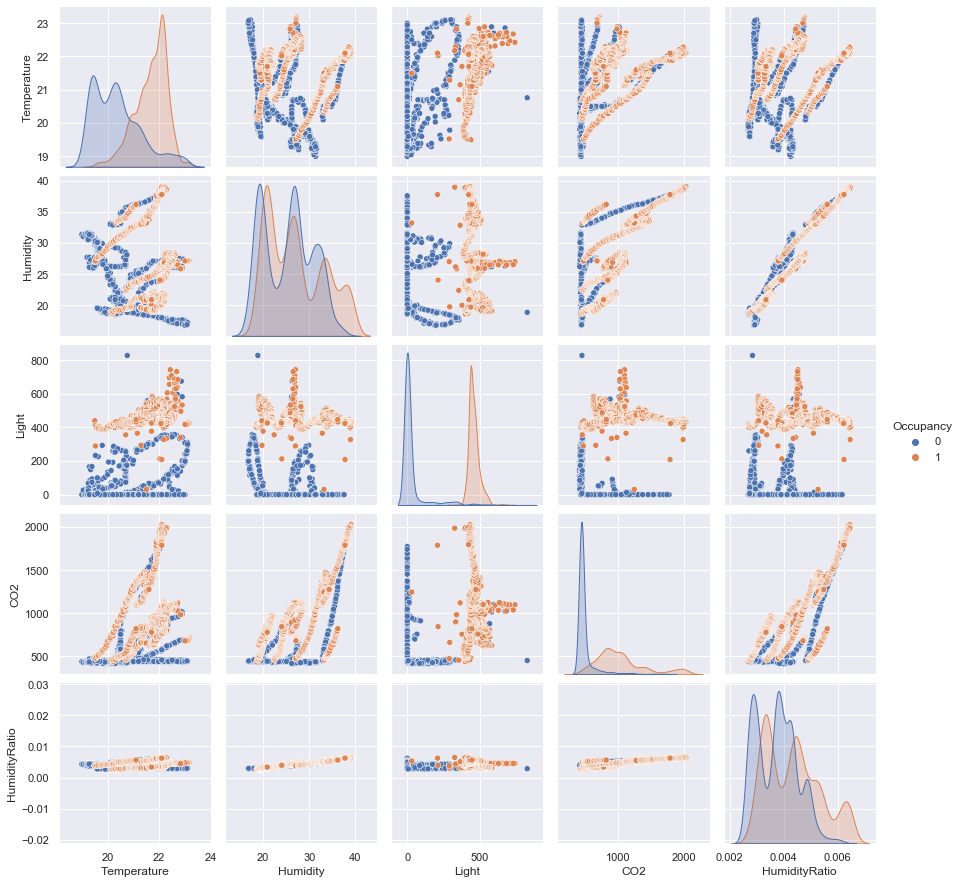

In [15]:
sns.pairplot(df, hue='Occupancy')
plt.show()

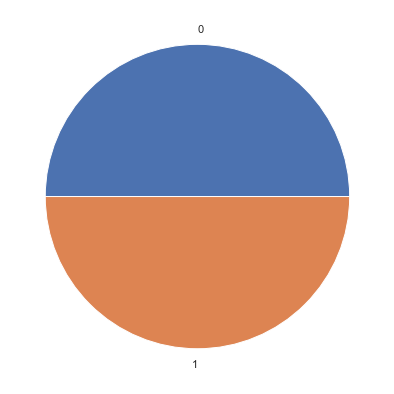

In [34]:
# Plotting a pie chart to give a visual representation of the proportion
# of each category in our data.
y =df['Occupancy']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [35]:
# Separating features and target 
X = df.drop(columns=['Occupancy'])
X.head(10)

Temperature  Humidity      Light         CO2  HumidityRatio
1458       21.945    23.795   0.000000  851.000000       0.003874
5727       19.390    27.200  20.666667  426.000000       0.003783
4850       19.390    30.840   0.000000  441.500000       0.004292
5151       19.200    31.200   0.000000  431.666667       0.004291
3174       20.000    18.840   0.000000  444.000000       0.002717
7802       20.200    32.900   0.000000  449.000000       0.004819
3281       20.000    18.700   0.000000  439.000000       0.002696
4649       19.600    28.890   0.000000  433.500000       0.004072
7525       20.390    33.000   0.000000  543.000000       0.004891
79         22.245    27.245   0.000000  591.000000       0.004522

In [36]:
X.describe().transpose()

count        mean         std         min         25%  \
Temperature    3456.0   21.027107    1.026996   19.000000   20.200000   
Humidity       3456.0   26.255407    5.791173   16.790000   20.897125   
Light          3456.0  246.739733  226.743412    0.000000    0.000000   
CO2            3456.0  766.270923  396.792935  412.750000  446.000000   
HumidityRatio  3456.0    0.004048    0.000936    0.002682    0.003285   

                      50%        75%          max  
Temperature     21.100000   21.94500    23.180000  
Humidity        26.290000   31.10000    39.117500  
Light          399.666667  454.00000  1546.333333  
CO2            626.000000  998.75000  2028.500000  
HumidityRatio    0.003907    0.00459     0.006476

**Standardize the Data**

In [37]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Temperature  Humidity     Light       CO2  HumidityRatio
0     0.893894 -0.424916 -1.088347  0.213566      -0.185767
1    -1.594304  0.163133 -0.997188 -0.857677      -0.283325
2    -1.594304  0.791766 -1.088347 -0.818608       0.261025
3    -1.779337  0.853939 -1.088347 -0.843394       0.259972
4    -1.000253 -1.280653 -1.088347 -0.812307      -1.421904
5    -0.805482  1.147532 -1.088347 -0.799704       0.823596
6    -1.000253 -1.304831 -1.088347 -0.824910      -1.443557
7    -1.389795  0.454998 -1.088347 -0.838773       0.026091
8    -0.620450  1.164802 -1.088347 -0.562770       0.900819
9     1.186050  0.170904 -1.088347 -0.441783       0.506519

**Observations and variables**

In [39]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

[Text(0, 0, 'Temperature'),
 Text(0, 0, 'Humidity'),
 Text(0, 0, 'Light'),
 Text(0, 0, 'CO2'),
 Text(0, 0, 'HumidityRatio')]

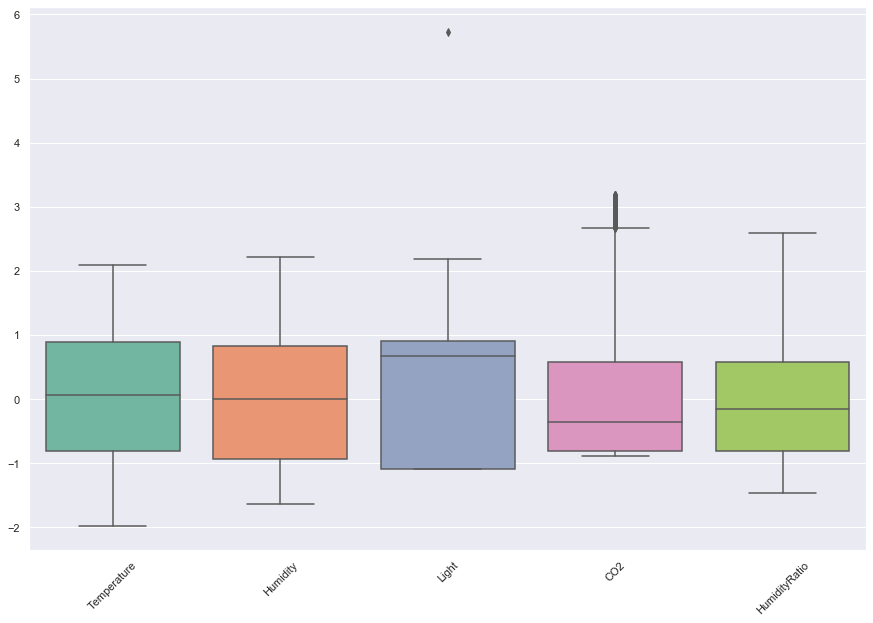

In [40]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

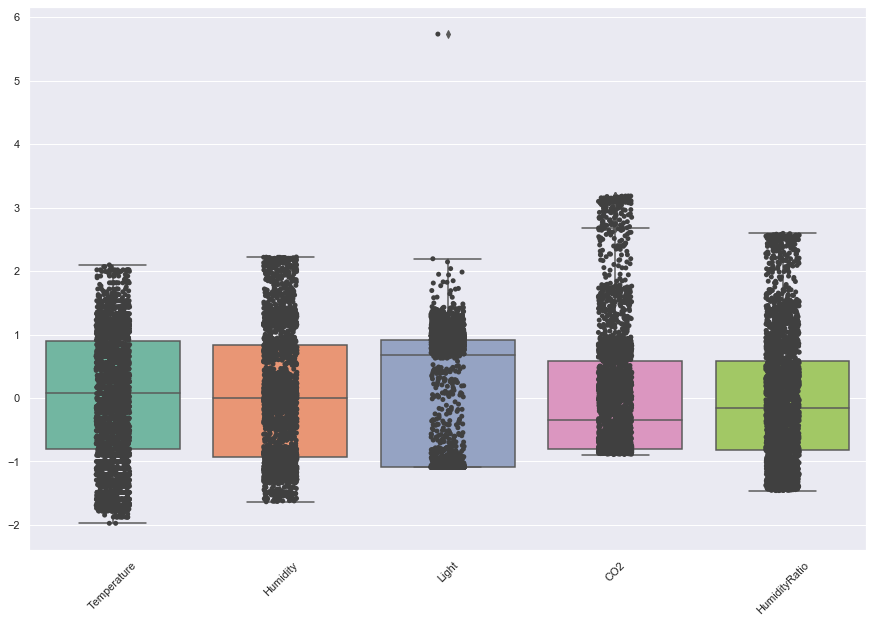

In [41]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

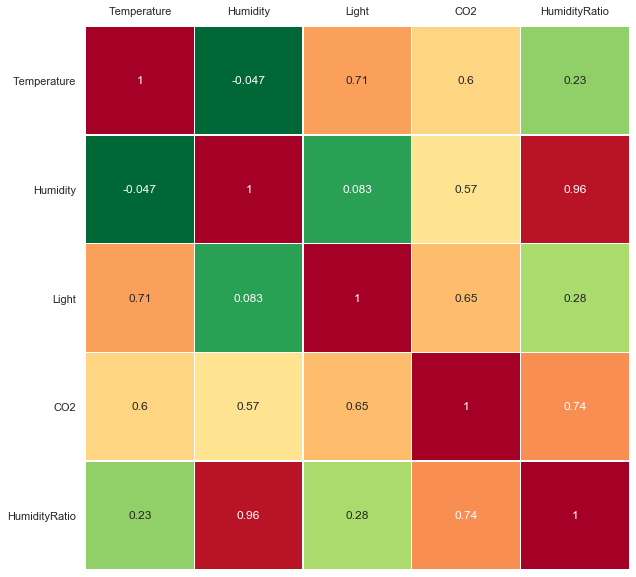

In [42]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

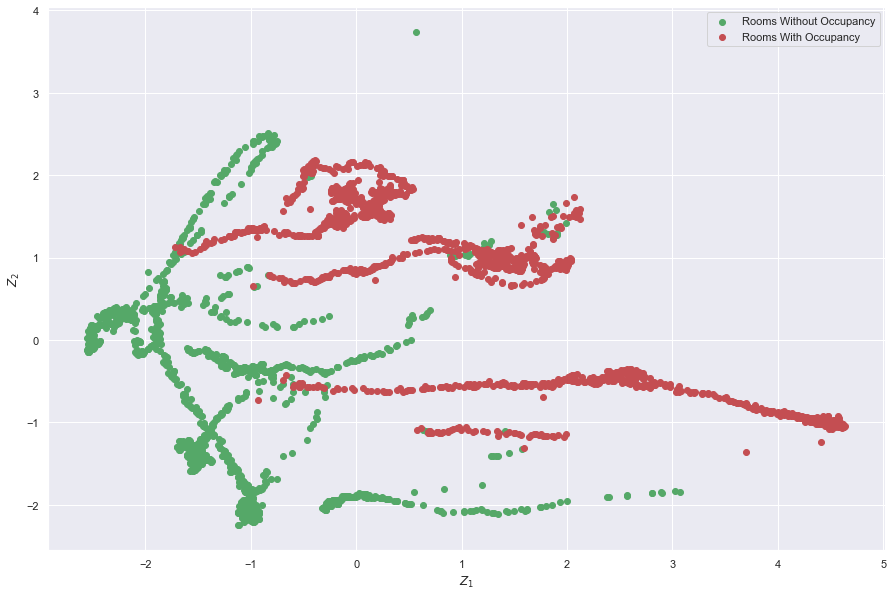

In [43]:
pca = PCA()
Z = pca.fit_transform(X)


idx_without_occupancy= np.where(y == 0)
idx_with_occupancy = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_without_occupancy,0], Z[idx_without_occupancy,1], c='g', label='Rooms Without Occupancy')
plt.scatter(Z[idx_with_occupancy,0], Z[idx_with_occupancy,1], c='r', label='Rooms With Occupancy')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[ 0.35794475,  0.54744588, -0.67297914,  0.29457582, -0.18028513],
       [ 0.40857382, -0.55850197,  0.05794227,  0.26420903, -0.66931253],
       [ 0.39674663,  0.48076328,  0.72496279,  0.29243527,  0.01921833],
       [ 0.54509364,  0.06787264, -0.00552791, -0.83388778, -0.05354298],
       [ 0.50040786, -0.39068981, -0.13468545,  0.25006292,  0.71852753]])

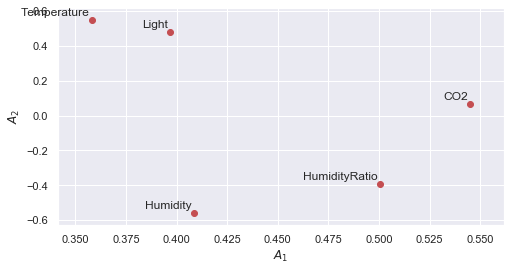

In [44]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

In [ ]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([2.97370328e+00, 1.58039376e+00, 2.89600447e-01, 1.57033155e-01,
       7.16538790e-04])

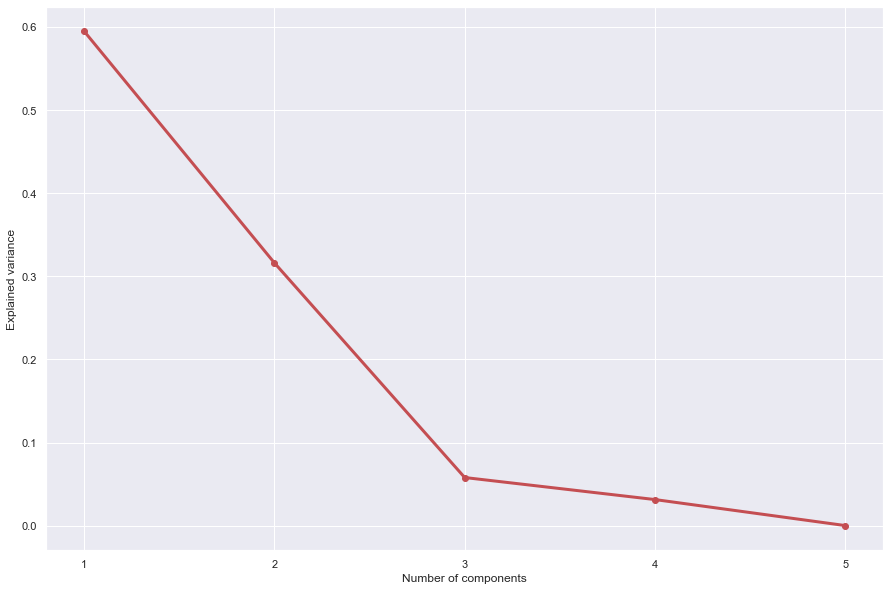

In [27]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

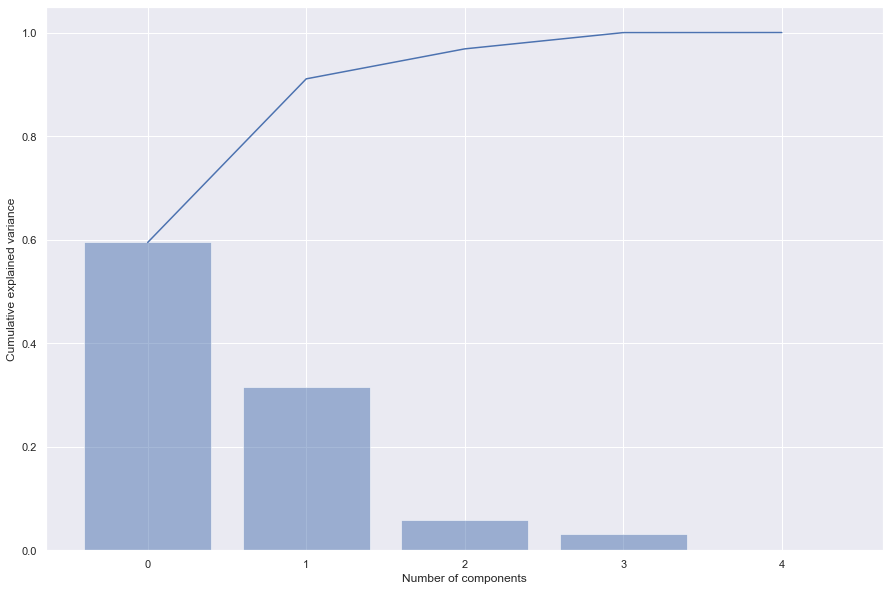

In [28]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([-0.12025438, -0.29887275, -0.05080444, ..., -1.13583317,
       -1.15860966, -1.11870671])

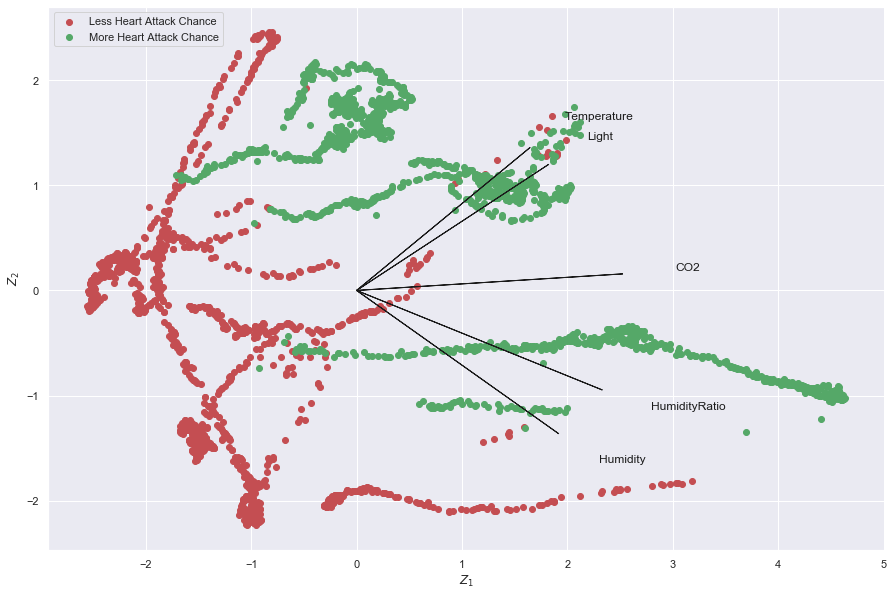

In [13]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_without_occupancy,0], Z[idx_without_occupancy,1], c='r', label='Rooms Without Occupancy')
plt.scatter(Z[idx_with_occupancy,0], Z[idx_with_occupancy,1], c='g', label='Rooms With Occupancy')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [ ]:
%pip install pca

In [30]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [31]:
out['PC']

PC1       PC2       PC3
0    -0.192282 -1.975353  0.349549
1    -1.921055 -0.049005  0.295779
2    -1.556675 -1.356588 -0.333159
3    -1.098992 -2.065523 -0.504130
4    -0.976815 -2.197212 -0.420605
...        ...       ...       ...
3451  1.873849 -1.172015 -0.469932
3452  1.861185 -1.155034 -0.471048
3453  1.915650 -1.150501 -0.434617
3454  1.971025 -1.173642 -0.432222
3455  1.987264 -1.133987 -0.477844

[3456 rows x 3 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [3456] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [3456] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fec181a92b0>)

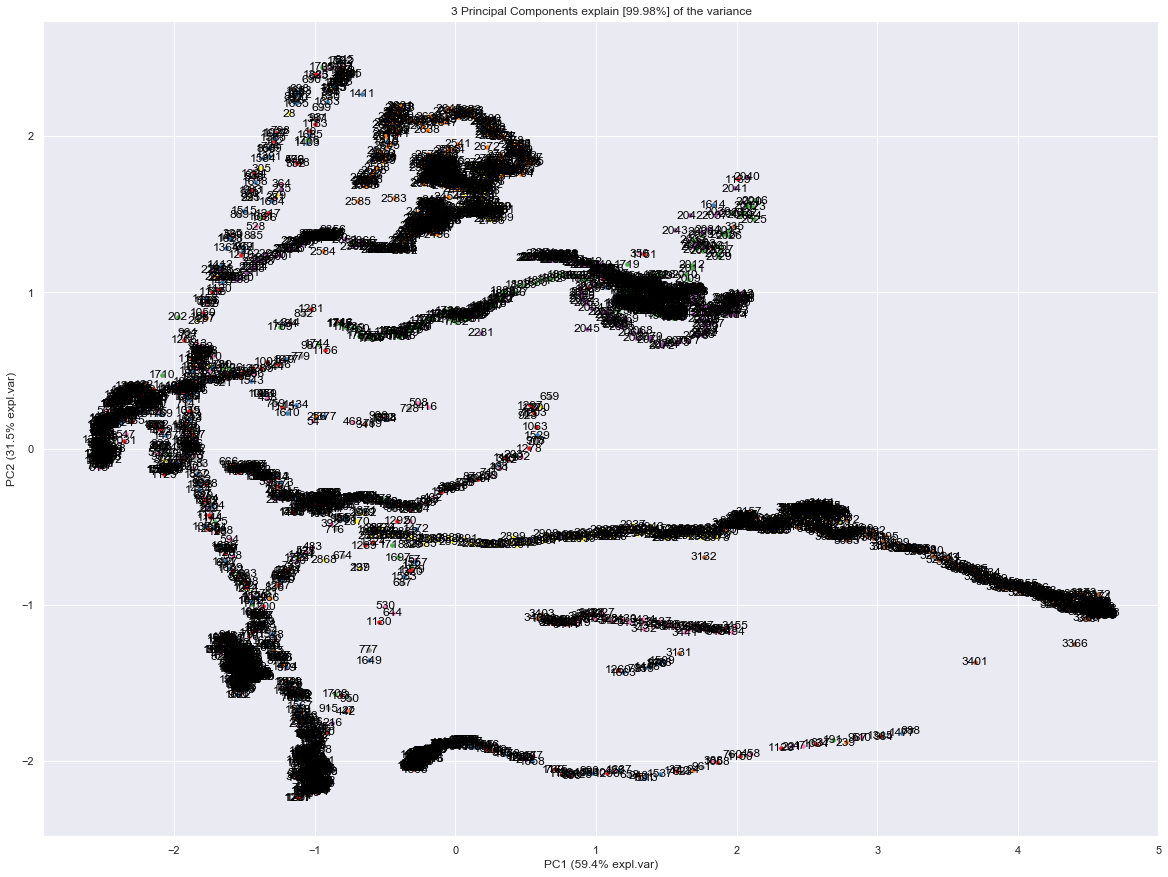

In [32]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [33]:
A = out['loadings'].T
A

PC1       PC2       PC3
Temperature    0.360218  0.545269  0.671574
Humidity       0.407093 -0.559707 -0.062611
Light          0.396755  0.481538 -0.726083
CO2            0.545281  0.065993  0.009160
HumidityRatio  0.499772 -0.391377  0.133375

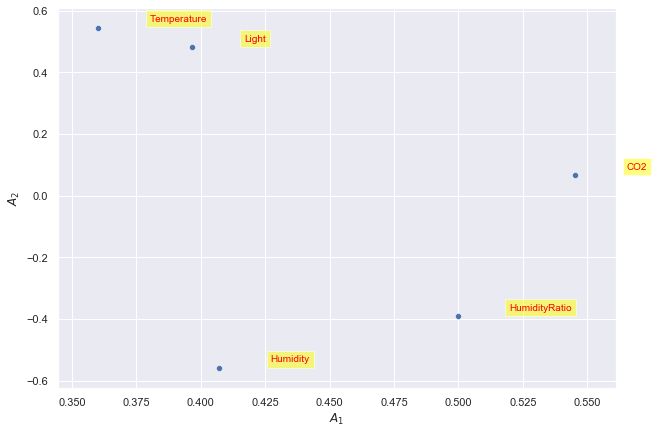

In [34]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
 

**Scree Plot**

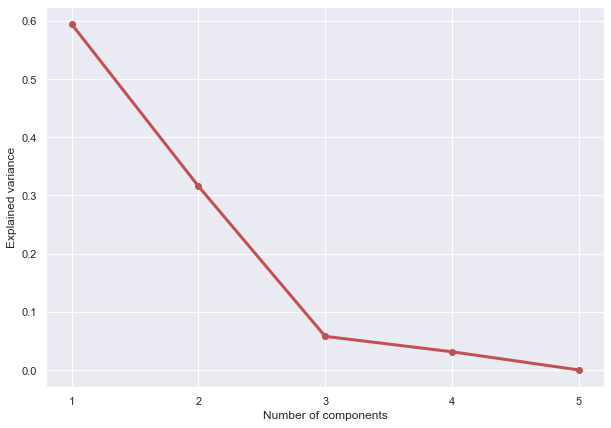

In [35]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

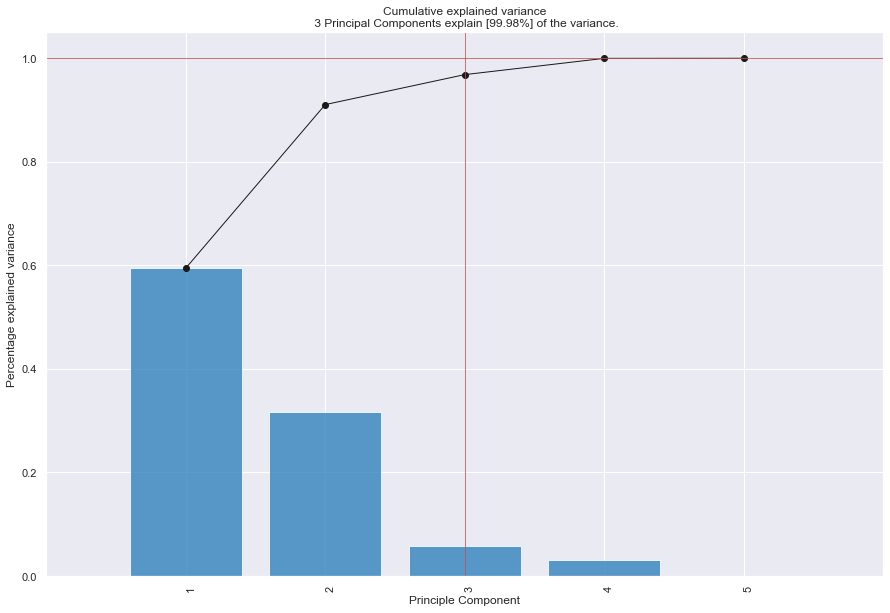

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7febfa0a7310>)

<Figure size 720x504 with 0 Axes>

In [36]:
model.plot()

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [3456] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [3456] unique colors! Available unique colors: [9].


(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7febff1c1fa0>)

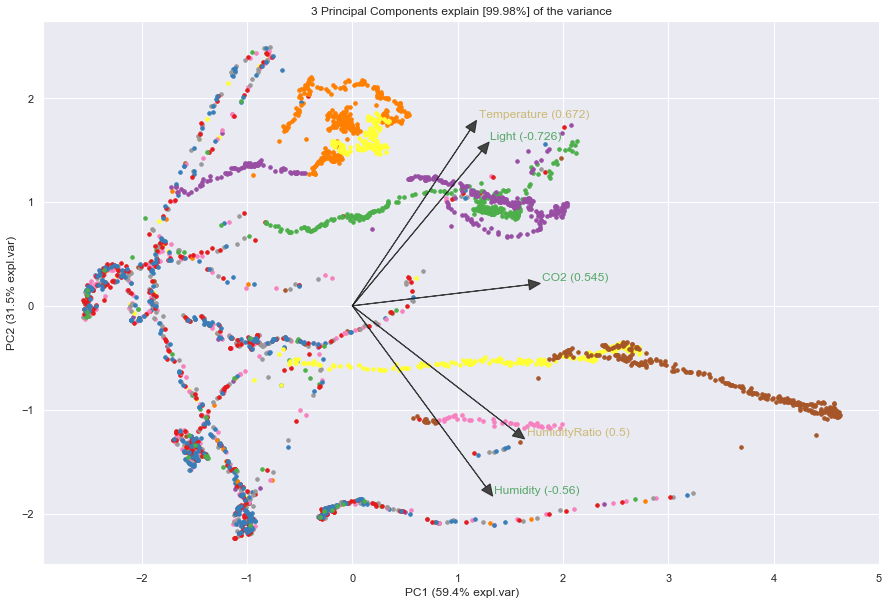

In [37]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [3456] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [3456] unique colors! Available unique colors: [9].


(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fec02b1ed60>)

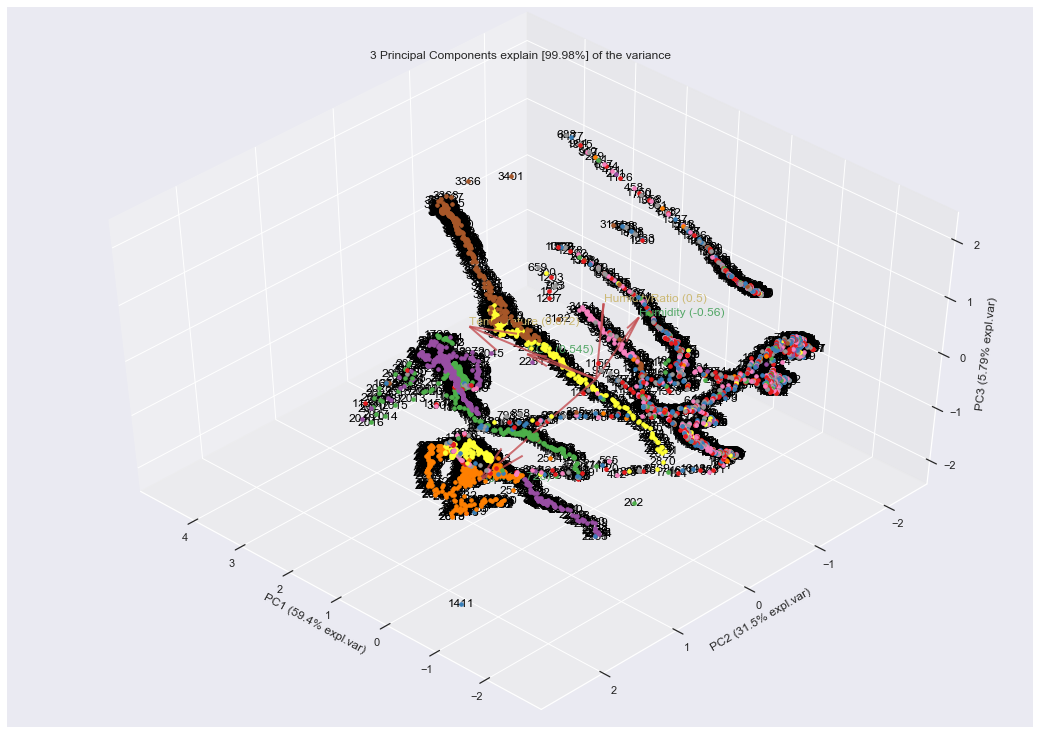

In [38]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. 
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [39]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

In [40]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3110, 6)
Unseen Data For Predictions: (346, 6)


In [ ]:
from pycaret.classification import *

In [42]:
clf = setup(data=data, target='Occupancy', train_size=0.7, n_jobs=4, session_id=123)

**Comparing All Models**

In [43]:
#show the best model and their statistics
best_model = compare_models()

In [44]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

 Create a Model 

**Logistic Regresssion**

In [45]:
lr = create_model('lr')

**Tune the model**

In [46]:
tuned_lr=tune_model(lr)

In [47]:
tuned_lr

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**


In [48]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with K-nearest neighbour**

In [49]:
knn = create_model('knn')

**Tune model with K-nearest neighbour**

In [50]:
tuned_knn = tune_model(knn)

In [51]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=4, n_neighbors=13, p=2,
                     weights='distance')

**Evaluate model with K-nearest neighbour**

In [52]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with Quadratic Discriminant Analysis**

In [53]:
qda=create_model('qda')

**Tune QDA Model**

In [54]:
tuned_qda=tune_model(qda)

**Evaluate QDA Model**

In [55]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

In [56]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
%pip install statsmodels --upgrade

# **Classification + PCA**

In [57]:
clf_pca = setup(data=data, target='Occupancy', train_size=0.7, session_id=123, n_jobs=4, normalize = True, pca = True, pca_components = 2)

# **Comparing Models**

In [58]:
#show the best model and their statistics
best_model_pca = compare_models()

# **Best model with PCA**

In [59]:
best_model_pca

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=4, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=123, reg_alpha=0, ...)

# **Tune Best Model**

In [60]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

# **Evaluate Best Model**

In [61]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [62]:
lr_pca = create_model('lr')

# **Tune Model**

In [63]:
tuned_lr_pca = tune_model(lr_pca)

# **Evaluate Model**

In [64]:
tuned_lr_pca

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create K-nearest neighbour Model**

In [67]:
knn_pca = create_model('knn')

# **Tune Model**

In [68]:
tuned_knn_pca = tune_model(knn_pca)

In [69]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=4, n_neighbors=9, p=2,
                     weights='distance')

# **Evaluate Model KNN**

In [70]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create Quadratic Discriminant Analysis Model**

In [71]:
qda_pca = create_model('qda')

# **Tune model**

In [72]:
tuned_qda_pca = tune_model(qda_pca)

# **Evaluate Model**

In [73]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.66,
                              store_covariance=False, tol=0.0001)

In [74]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [75]:
et_pca = create_model('et')

In [76]:
tuned_et_pca = tune_model(et_pca)

In [77]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=4, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [78]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
%pip install shap

In [79]:
import shap

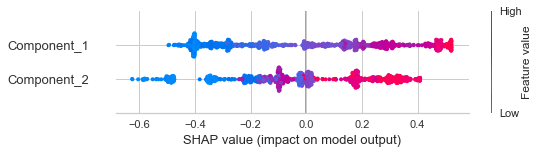

In [80]:
interpret_model(tuned_et_pca, plot='summary')


In [81]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

In [82]:
interpret_model(tuned_et_pca, plot='reason')